In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
import optuna

In [3]:
df=pd.read_csv('D:\machine learning\heart project\heart_disease_data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_10488\236011279.py:1: SyntaxWarning: invalid escape sequence '\m'
  df=pd.read_csv('D:\machine learning\heart project\heart_disease_data.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


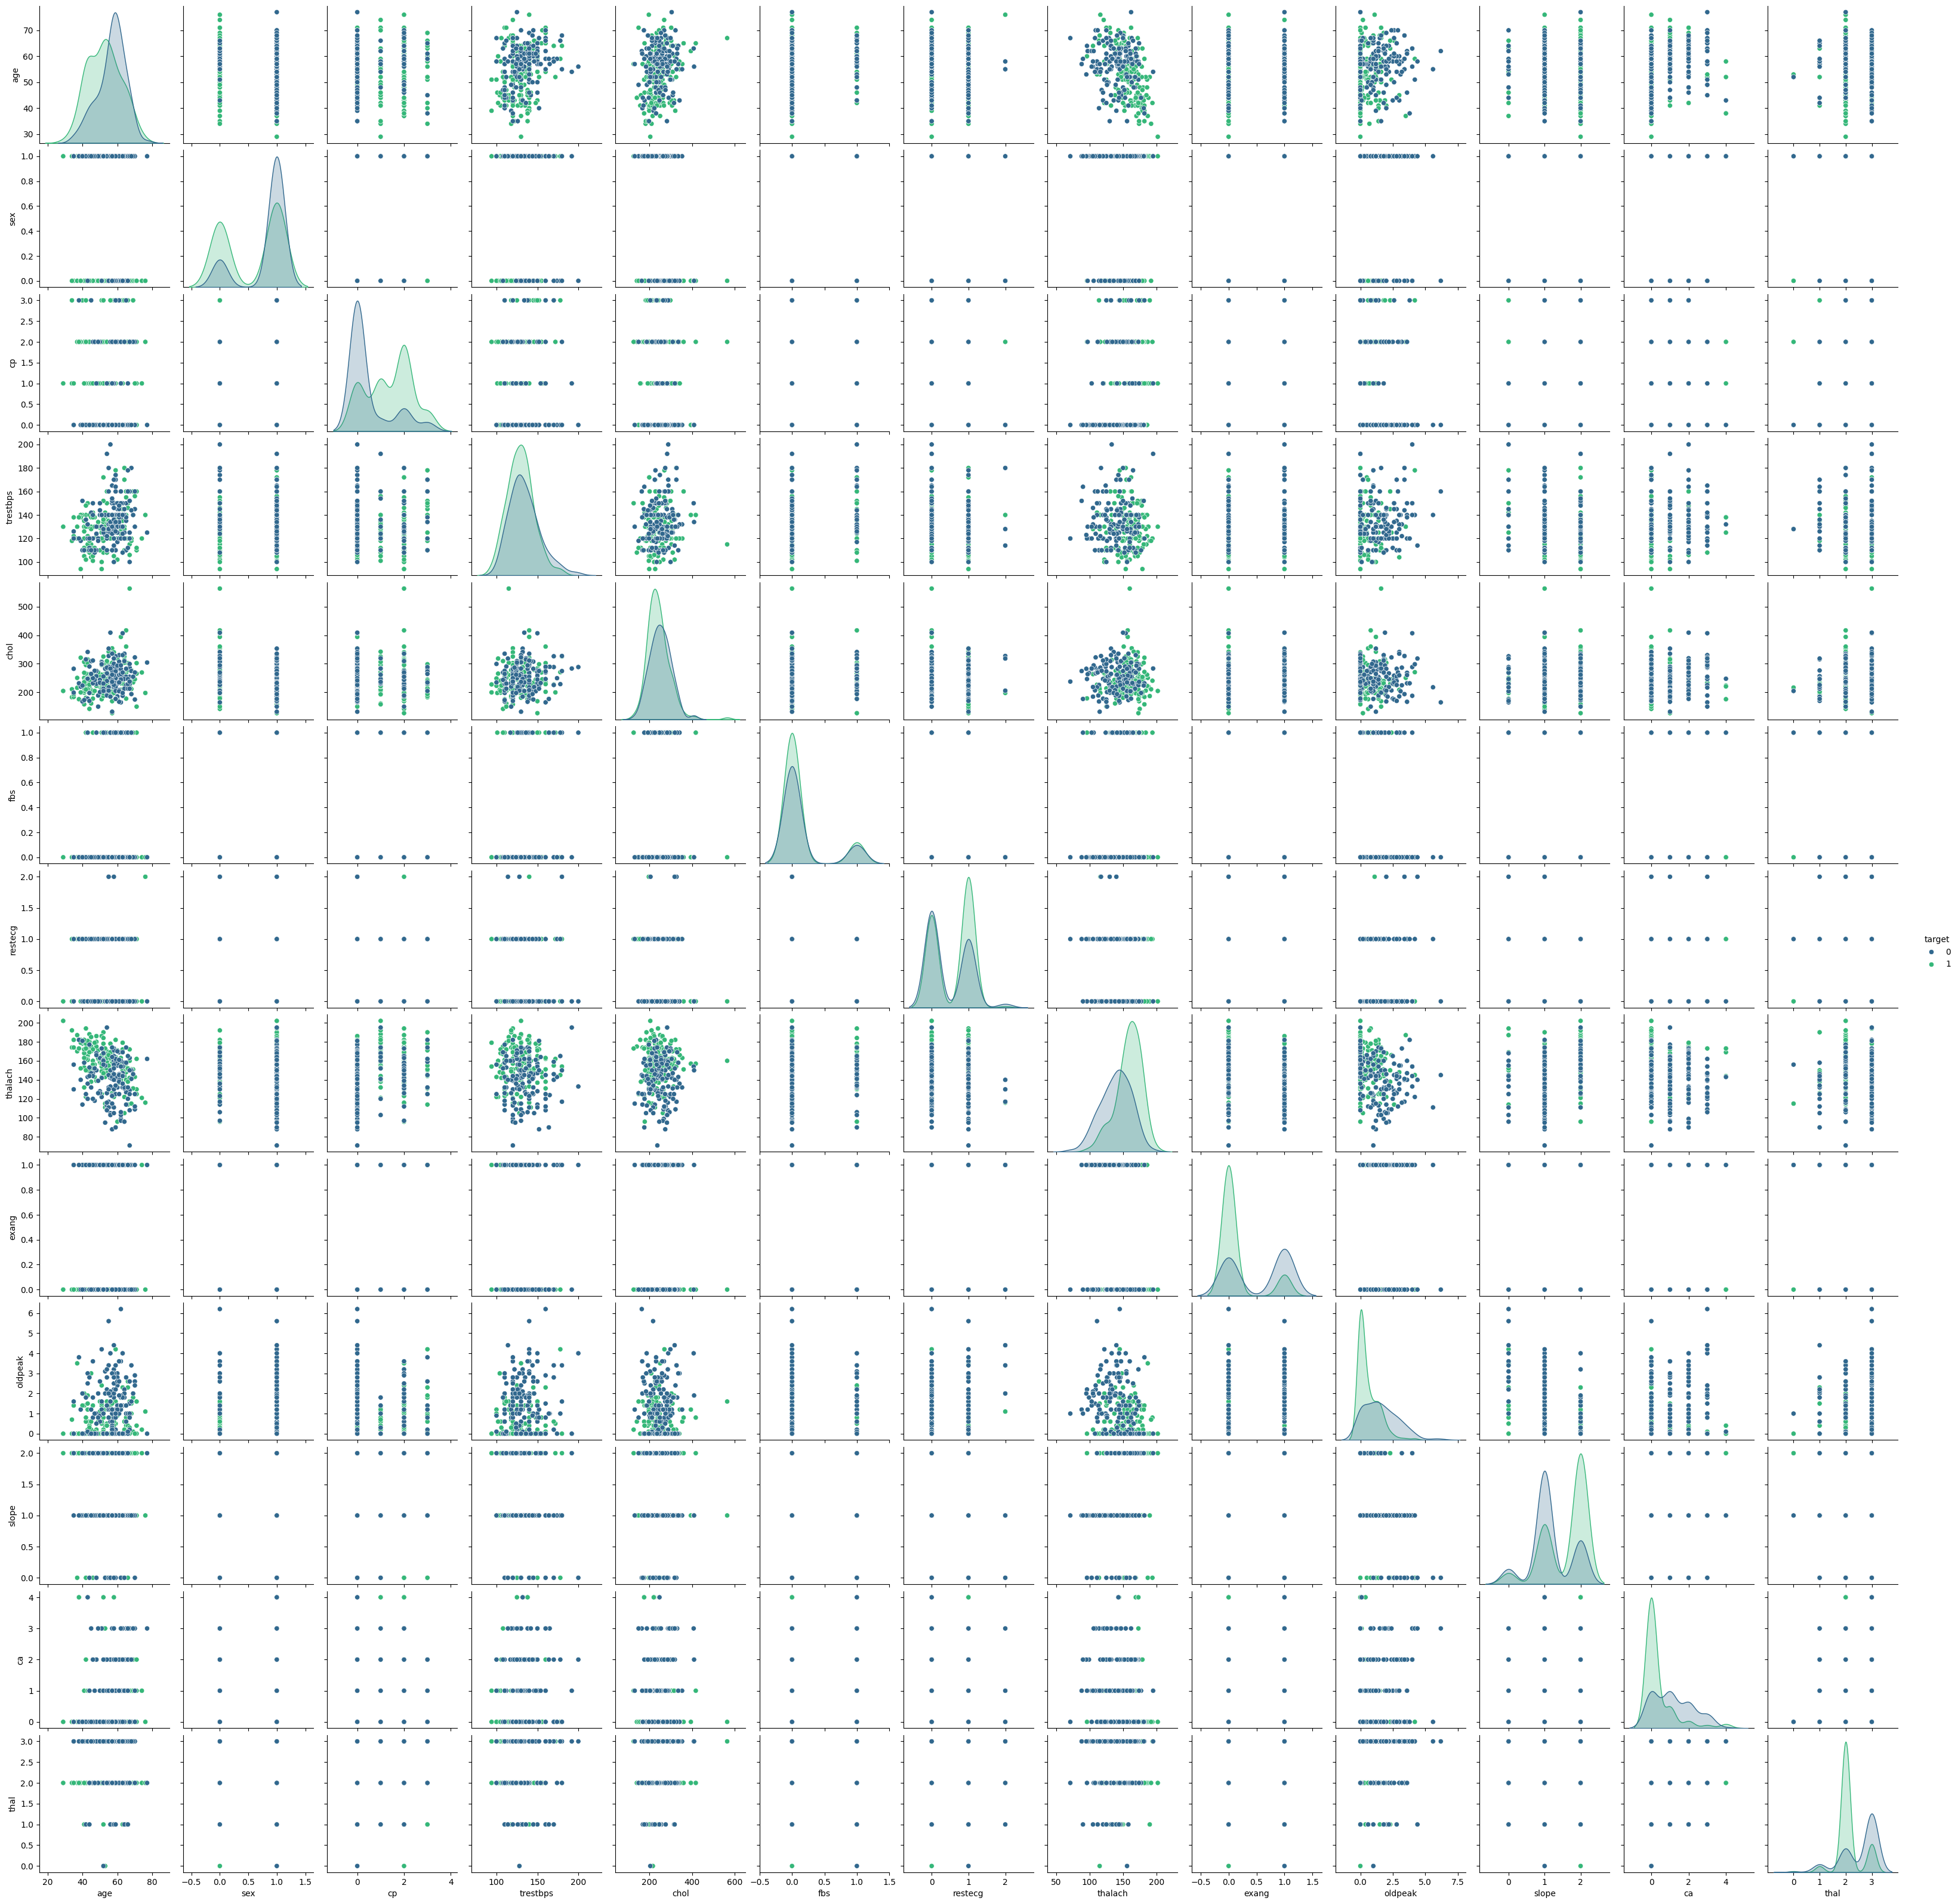

In [7]:
plt.figsize=(12,12)
sns.pairplot(df, hue='target', palette='viridis')

<Axes: >

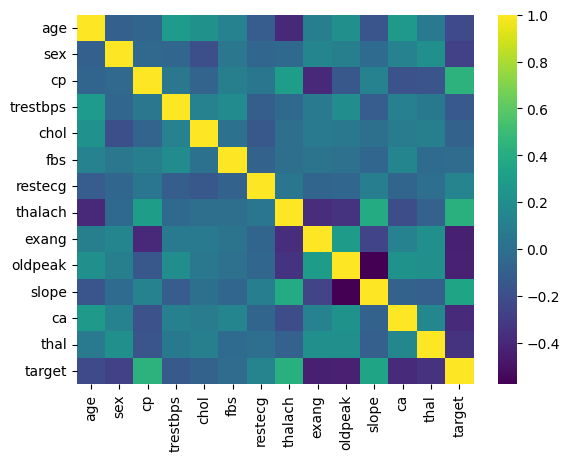

In [8]:
cor=df.corr()
sns.heatmap(cor,cmap='viridis')

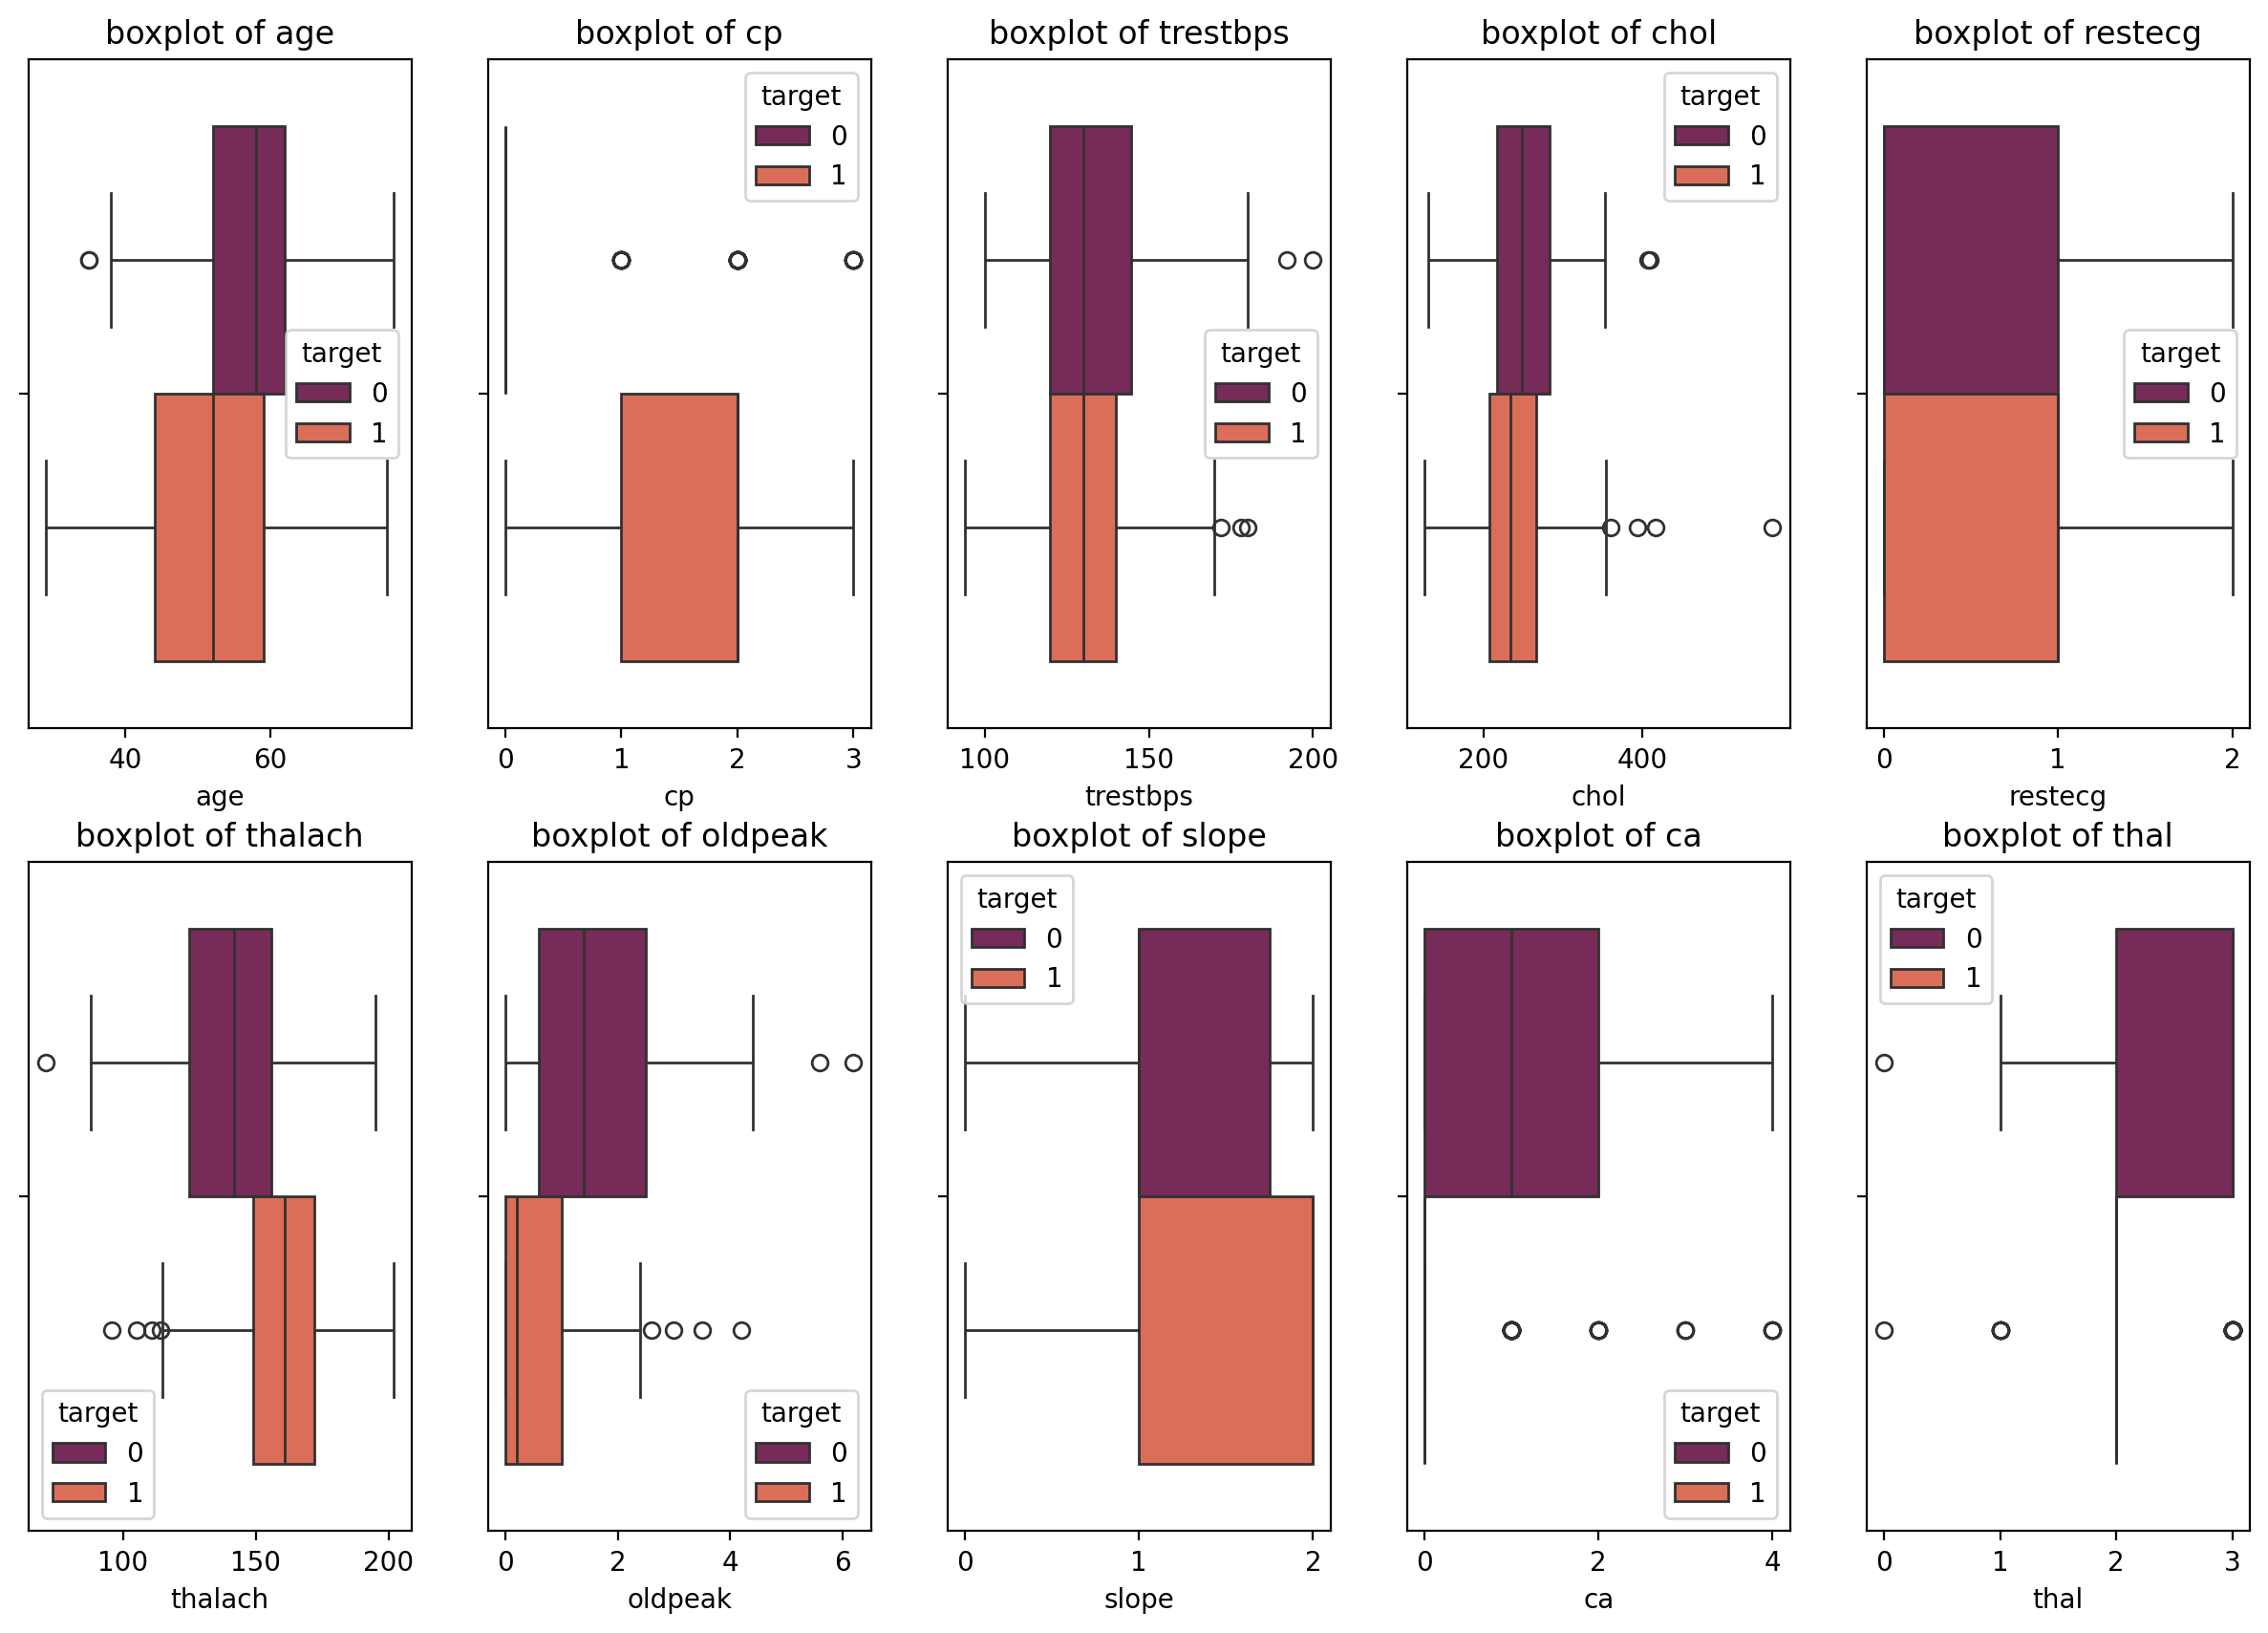

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(15, 10),dpi=200)
axes = axes.ravel()

for i, col in enumerate(df.columns.drop(['target', 'sex', 'fbs', 'exang'])): #add sex to the DS
    sns.boxplot(data=df, x=col, ax=axes[i], palette='rocket',hue='target')
    axes[i].set_title(f'boxplot of {col}')

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_10488\2409024769.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y=col, palette='viridis', ax=axes[i])
C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_10488\2409024769.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y=col, palette='viridis', ax=axes[i])
C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_10488\2409024769.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y=col, palette='viridis', ax=axes[i])
C:\Users\ABHISHEK\A

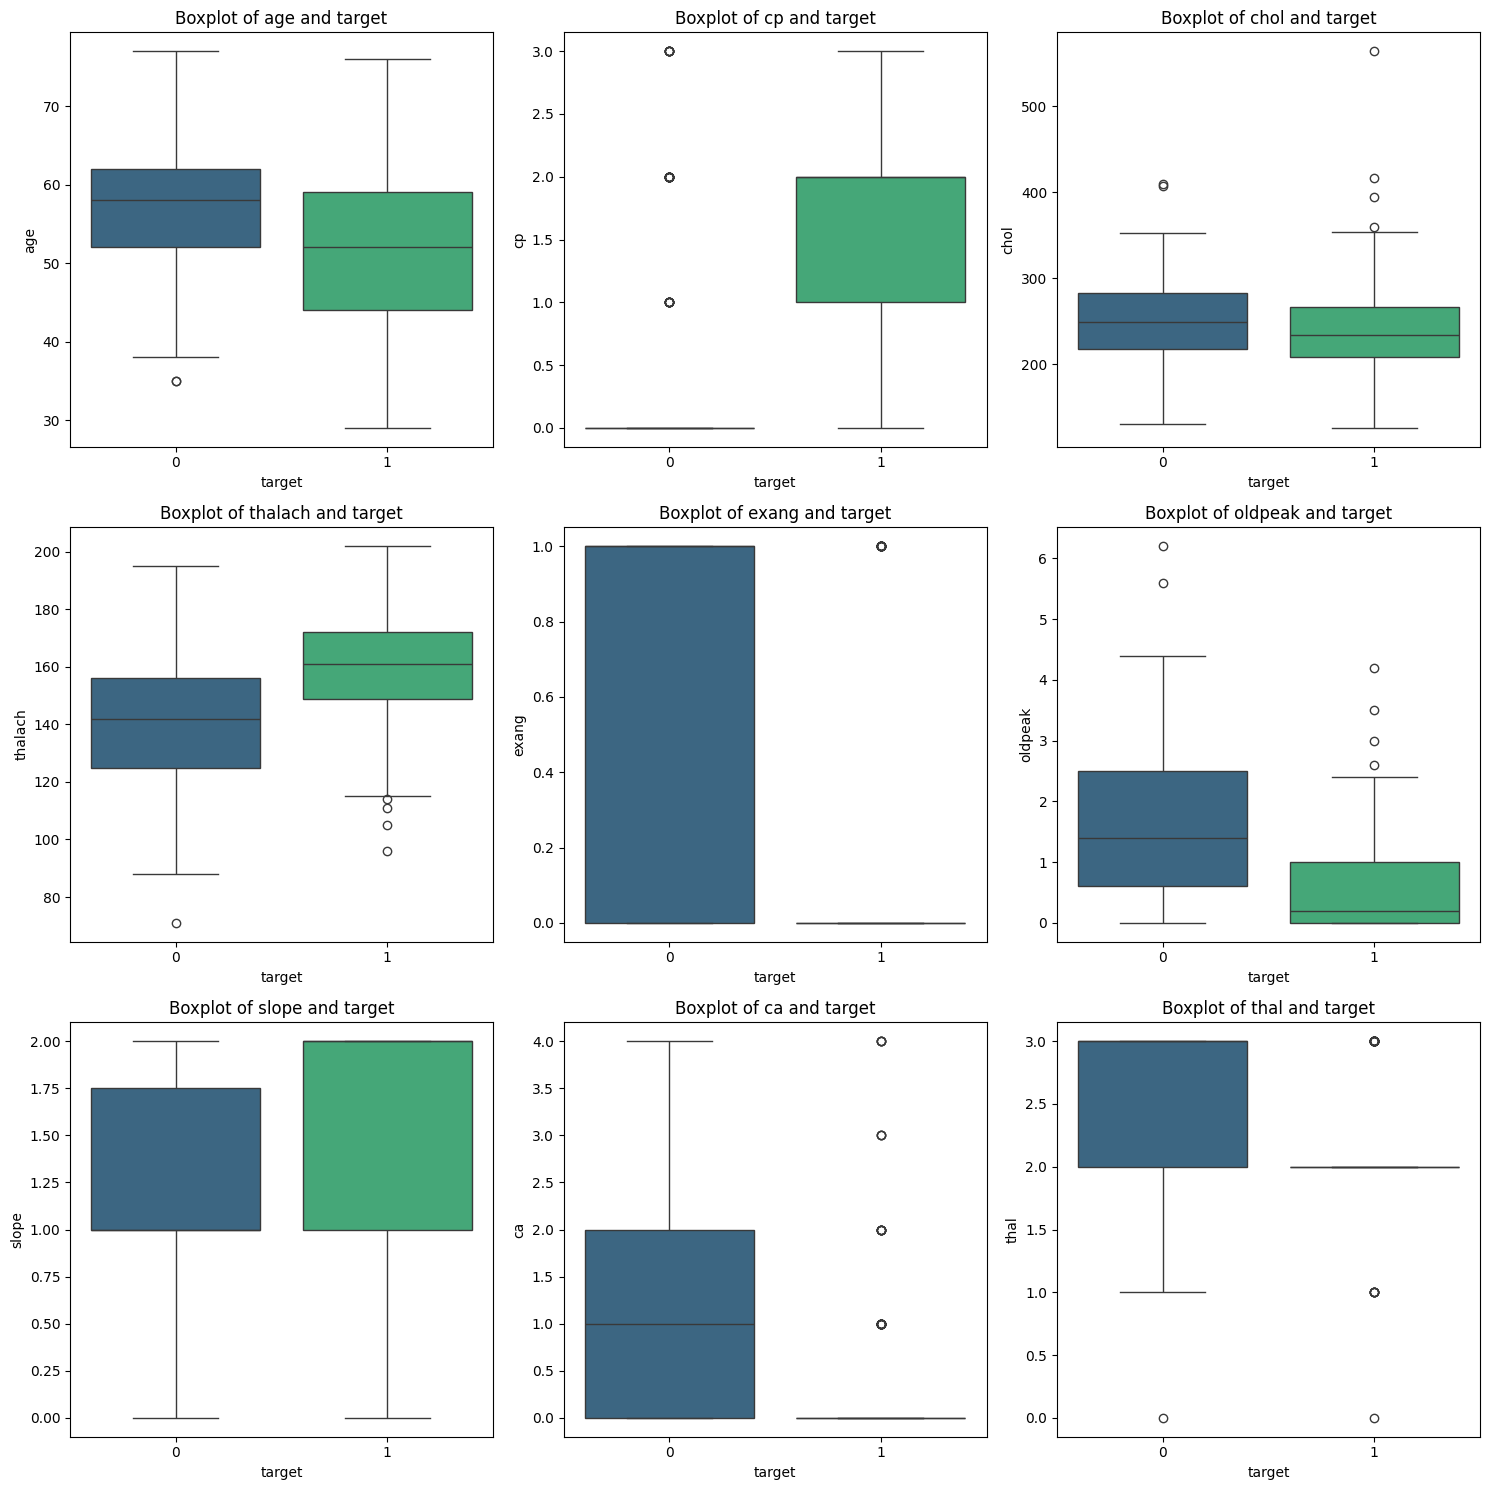

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))  


axes = axes.flatten()

columns = ['age', 'cp', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


for i, col in enumerate(columns):
    sns.boxplot(data=df, x='target', y=col, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} and target')


plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler( )
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)


In [12]:
from xgboost import XGBClassifier

model= XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    verbosity=0,
    booster='gbtree'
)

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report


In [14]:

def objective(trial):
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dtest = xgb.DMatrix(x_test, label=y_test)

    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
    }

    model2 = xgb.train(param, dtrain)
    preds = model2.predict(dtest)
    pred_labels = np.rint(preds)
    accuracy = roc_auc_score(y_test, preds)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial


print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('AUC: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))






[I 2024-08-21 22:20:32,768] A new study created in memory with name: no-name-2275c87a-3fc0-461e-8b61-087c1cab9835
C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_10488\531417259.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_10488\531417259.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_10488\531417259.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
AUC: 0.9262626262626263
Best hyperparameters: {'lambda': 5.02869028265783e-06, 'alpha': 0.3385034057648123, 'max_depth': 2, 'eta': 0.49859279743248996, 'gamma': 0.0024963177496240903, 'grow_policy': 'depthwise'}


In [15]:

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

param = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'verbosity': 0,
    'booster': 'gbtree',
    'lambda': trial.params['lambda'],
    'alpha': trial.params['alpha'],
    'max_depth': trial.params['max_depth'],
    'eta': trial.params['eta'],
    'gamma': trial.params['gamma'],
    'grow_policy': trial.params['grow_policy']
}
model2 = xgb.train(param, dtrain)
y_pred = model2.predict(dtest)
pred_labels = np.rint(y_pred)
accuracy = roc_auc_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 92.63%


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        36
           1       0.85      0.85      0.85        55

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



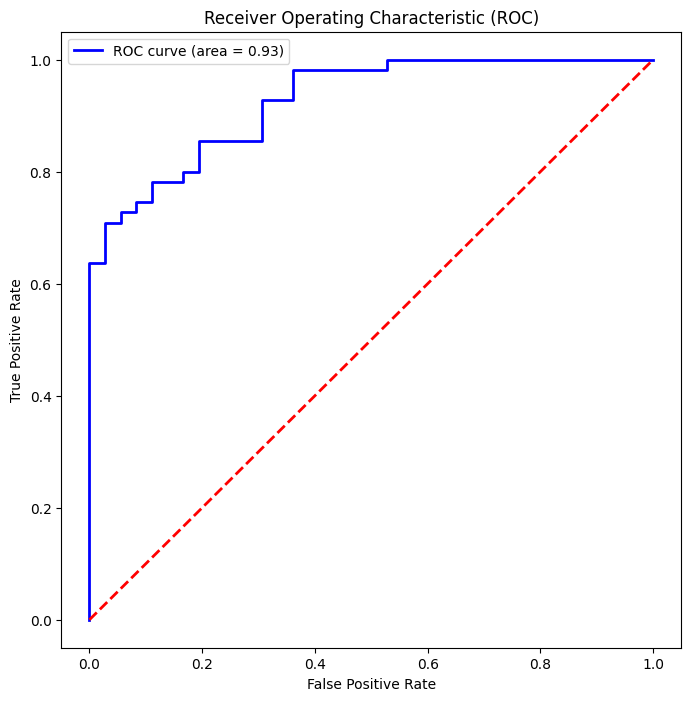

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % accuracy)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

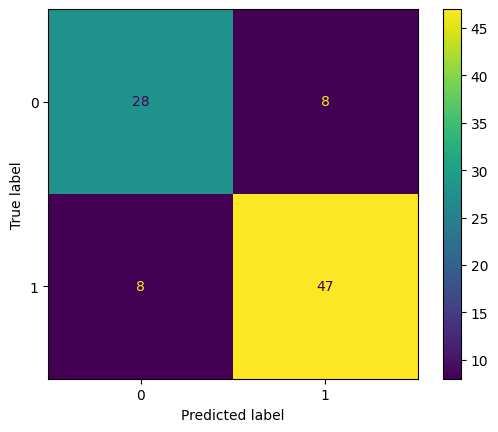

In [18]:
cm = confusion_matrix(pred_labels,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

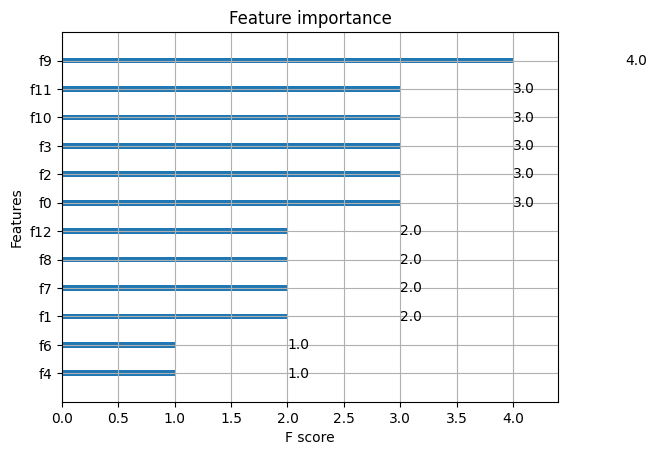

In [19]:
xgb.plot_importance(model2)
plt.show()